<a href="https://colab.research.google.com/github/Vasavi430/Cursor/blob/main/Confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv('/content/sports_data.csv')

In [15]:
data

,Player,Team,Position,Games Played,Points,Assists,Rebounds,true_labels,predicted_labels
0,LeBron James,Lakers,Forward,55,1500,400,500,0,0
1,Stephen Curry,Warriors,Guard,52,1600,450,300,1,0
2,Kevin Durant,Suns,Forward,50,1450,350,400,0,1
3,Giannis Antetokounmpo,Bucks,Forward,53,1550,300,600,1,1
4,Luka Doncic,Mavericks,Guard,51,1480,500,400,0,0
5,Joel Embiid,76ers,Center,49,1400,250,700,1,0
6,Nikola Jokic,Nuggets,Center,54,1520,600,680,0,1
7,Jayson Tatum,Celtics,Forward,56,1490,320,450,1,1
8,Ja Morant,Grizzlies,Guard,50,1380,480,350,0,0
9,Kawhi Leonard,Clippers,Forward,48,1350,280,400,1,0


In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# Separate features and target variable
X = data.drop('Position', axis=1)  # Features
y = data['Position']               # Target variable


In [23]:
# One-hot encoding for categorical variables
X = pd.get_dummies(X, columns=['Player', 'Team'])


In [24]:
#Split Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [25]:
# Initialize Logistic Regression with higher max_iter to ensure convergence
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [26]:

data['true_labels'] = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # Replace with your true labels
data['predicted_labels'] = [0, 0, 1, 1, 0, 0, 1, 1, 0, 0] # Replace with your predicted labels

# Create confusion matrix
cm = confusion_matrix(data['true_labels'], data['predicted_labels'])

# Extract TP, TN, FP, FN
TN, FP, FN, TP = cm.ravel()

print("Confusion Matrix:")
print(cm)

print("\nTP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

Confusion Matrix:
[[3 2]
 [3 2]]

TP: 2
TN: 3
FP: 2
FN: 3


In [ ]:
data

,Player,Team,Position,Games Played,Points,Assists,Rebounds
0,LeBron James,Lakers,Forward,55,1500,400,500
1,Stephen Curry,Warriors,Guard,52,1600,450,300
2,Kevin Durant,Suns,Forward,50,1450,350,400
3,Giannis Antetokounmpo,Bucks,Forward,53,1550,300,600
4,Luka Doncic,Mavericks,Guard,51,1480,500,400
5,Joel Embiid,76ers,Center,49,1400,250,700
6,Nikola Jokic,Nuggets,Center,54,1520,600,680
7,Jayson Tatum,Celtics,Forward,56,1490,320,450
8,Ja Morant,Grizzlies,Guard,50,1380,480,350
9,Kawhi Leonard,Clippers,Forward,48,1350,280,400


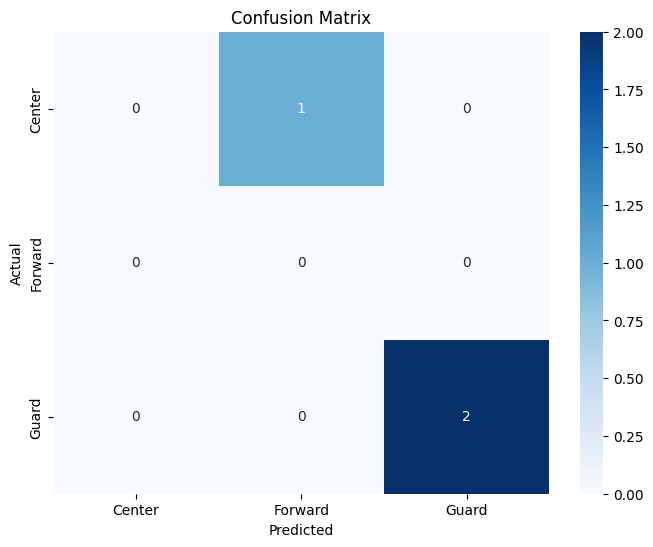

In [17]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
